# Creating spectrograms

In [1]:
import torch
from torch.utils import data
from torchaudio import datasets
import numpy as np
import os
from scipy.io import wavfile
from tqdm import tqdm

from torchaudio import transforms as tf_audio
from torchvision import transforms as tf_img
from torchvision.transforms import functional as fn

import einops
import matplotlib.pyplot as plt
import librosa

trainPath = "../data/raw/train/bed/"

In [19]:
class TensorflowDataset:
    """
    Import paths of files
    """
    def __init__(self, directory : str, transforms):
        self.directory = str
        self.paths = []
        self.labels = []
        self.background_noise_label = "_background_noise_"
        self.transforms = transforms

        for i, (root, dirs, files) in enumerate(os.walk(trainPath)):

            if files:
                label = os.path.normpath(root).split("\\")[-1]
                if label != self.background_noise_label:
                    for file in tqdm(files):
                        filepath = os.path.normpath(os.path.join(root, file))
                    
                        self.paths.append(filepath)
                        self.labels.append(label)

        #assert len(np.unique(self.labels)) == 30

    def __len__(self):
        return len(self.paths)

    def __getitem__(self, idx):
        file_sr, file_data = wavfile.read(self.paths[idx])
        print(f"Len of mel spectrogram: {len(file_data)}")
        if len(file_data) != 16000:
            file_data = librosa.resample(file_data.astype(float), orig_sr=len(file_data), target_sr = 16000)
            print(f"Len of mel spectrogram after conversion: {len(file_data)}")
        file_data = torch.from_numpy(file_data).float()
        
        if self.transforms:
            return self.transforms(file_data)
        else:
            return file_data

In [20]:
SAMPLE_RATE = 16000

transforms = tf_img.Compose([
    tf_audio.MelSpectrogram(sample_rate=SAMPLE_RATE),
])


trainset = TensorflowDataset(trainPath, transforms=transforms)
trainloader = data.DataLoader(trainset, batch_size=6)

C:\Users\teran\Envs\DeepLearning\lib\site-packages\torchaudio\functional\functional.py:584: UserWarning: At least one mel filterbank has all zero values. The value for `n_mels` (128) may be set too high. Or, the value for `n_freqs` (201) may be set too low.
  warnings.warn(
100%|██████████| 1713/1713 [00:00<00:00, 179661.49it/s]


In [21]:
A = next(iter(trainloader))

Len of mel spectrogram: 16000
Len of mel spectrogram: 16000
Len of mel spectrogram: 14861
Len of mel spectrogram after conversion: 16000
Len of mel spectrogram: 16000
Len of mel spectrogram: 16000
Len of mel spectrogram: 16000


In [25]:
def display_spectrogram(spec : torch.tensor):
    fig, ax = plt.subplots()
    spec_db = librosa.power_to_db(spec.numpy())
    ax.imshow(spec_db, origin="lower", aspect="auto", interpolation="nearest")
    plt.show()

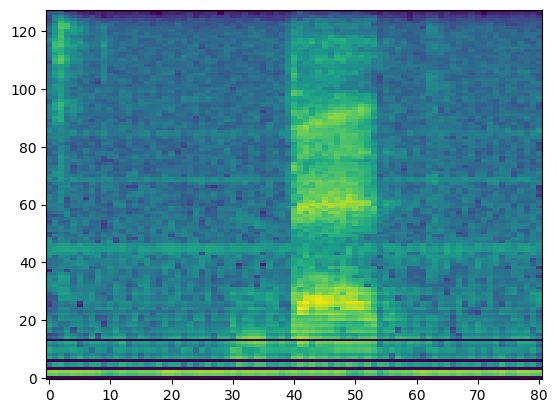

In [41]:
display_spectrogram(A[5])

# Tokanization